<a href="https://colab.research.google.com/github/sc-mari-a/MN/blob/main/%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%BB%D1%80_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 3. Машинне навчання
**Автор: Дорошенко Марія Андріївна ФІТ 4-11**

**Була присутня на парі**

[Посилання на GitHub](https://github.com/sc-mari-a/MN/blob/main/%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%BB%D1%80_3.ipynb)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Завантажити датасет.

1 варіант
Завантажити датасет з диску
https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1u_-3X05st6uvrgQB1qNLyE8a7QjTJjvd%2Fview%3Fusp%3Dsharing




In [2]:
from google.colab import files

# Завантаження файлу
uploaded = files.upload()

In [ ]:
df = pd.read_csv('house_price_regression_dataset.csv')
df

2 варіант
Завантажити напряму з платформи за посиланням
https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fprokshitha%2Fhome-value-insights

In [4]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("prokshitha/home-value-insights")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'home-value-insights' dataset.
Path to dataset files: /kaggle/input/home-value-insights


In [5]:
df = pd.read_csv(os.path.join(path, "house_price_regression_dataset.csv"))

df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


1. **Square_Footage** Загальна житлова площа будинку в квадратних футах (або метрах, якщо перекладати в метричну систему).
2. **Num_Bedrooms** Кількість спалень у будинку.
3. **Num_Bathrooms** Кількість ванних кімнат. Часто може бути дробовим числом (наприклад, 1.5 – одна повна ванна і один туалет).
4. **Year_Built** Рік побудови будинку. Може впливати на стан житла, дизайн, матеріали тощо.
5. **Lot_Size** Розмір ділянки (землі), на якій розташований будинок.
6. **Garage_Size** Розмір гаража, зазвичай кількість паркомісць (наприклад, 1, 2 тощо).
7. **Neighborhood_Quality** Оцінка якості району. Це може бути числова шкала (наприклад, 1–10) або категорія. Враховує безпеку, школи, транспорт, інфраструктуру тощо.
8. **House_Price** Ціна будинку – цільова змінна, яку часто передбачають у моделі.



Вивести інфомацію про датасет

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Перевіримо на дублікати

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


Статистичні характеристики датасета


In [9]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


Ще так можна перевірити пропущені значення

Вивести значення для стовпчика Neighborhood_Quality


In [10]:
df['Neighborhood_Quality'].value_counts()

,count
Neighborhood_Quality,
10,123
5,109
2,105
7,102
6,101
4,99
8,97
1,91
9,88


Побудувати діаграму для Neighborhood_Quality

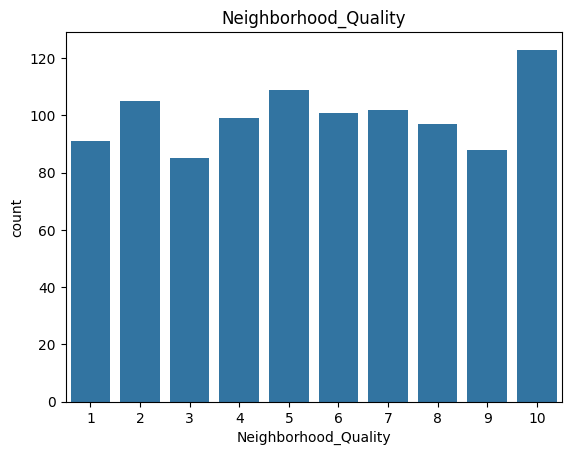

In [11]:
sns.countplot(x='Neighborhood_Quality', data=df)
plt.title('Neighborhood_Quality')
plt.show()

Перевіримо значення в стовпці "Кількість ваних кімнат"

In [12]:
df['Num_Bathrooms'].value_counts()

,count
Num_Bathrooms,
1,350
2,327
3,323


Побудуємо гістограму.

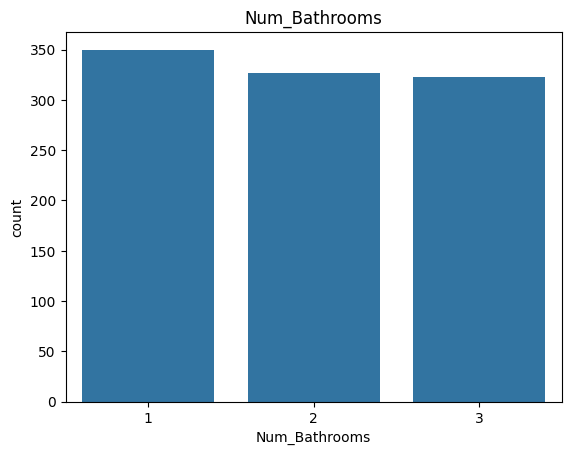

In [13]:
sns.countplot(x='Num_Bathrooms', data=df)
plt.title('Num_Bathrooms')
plt.show()

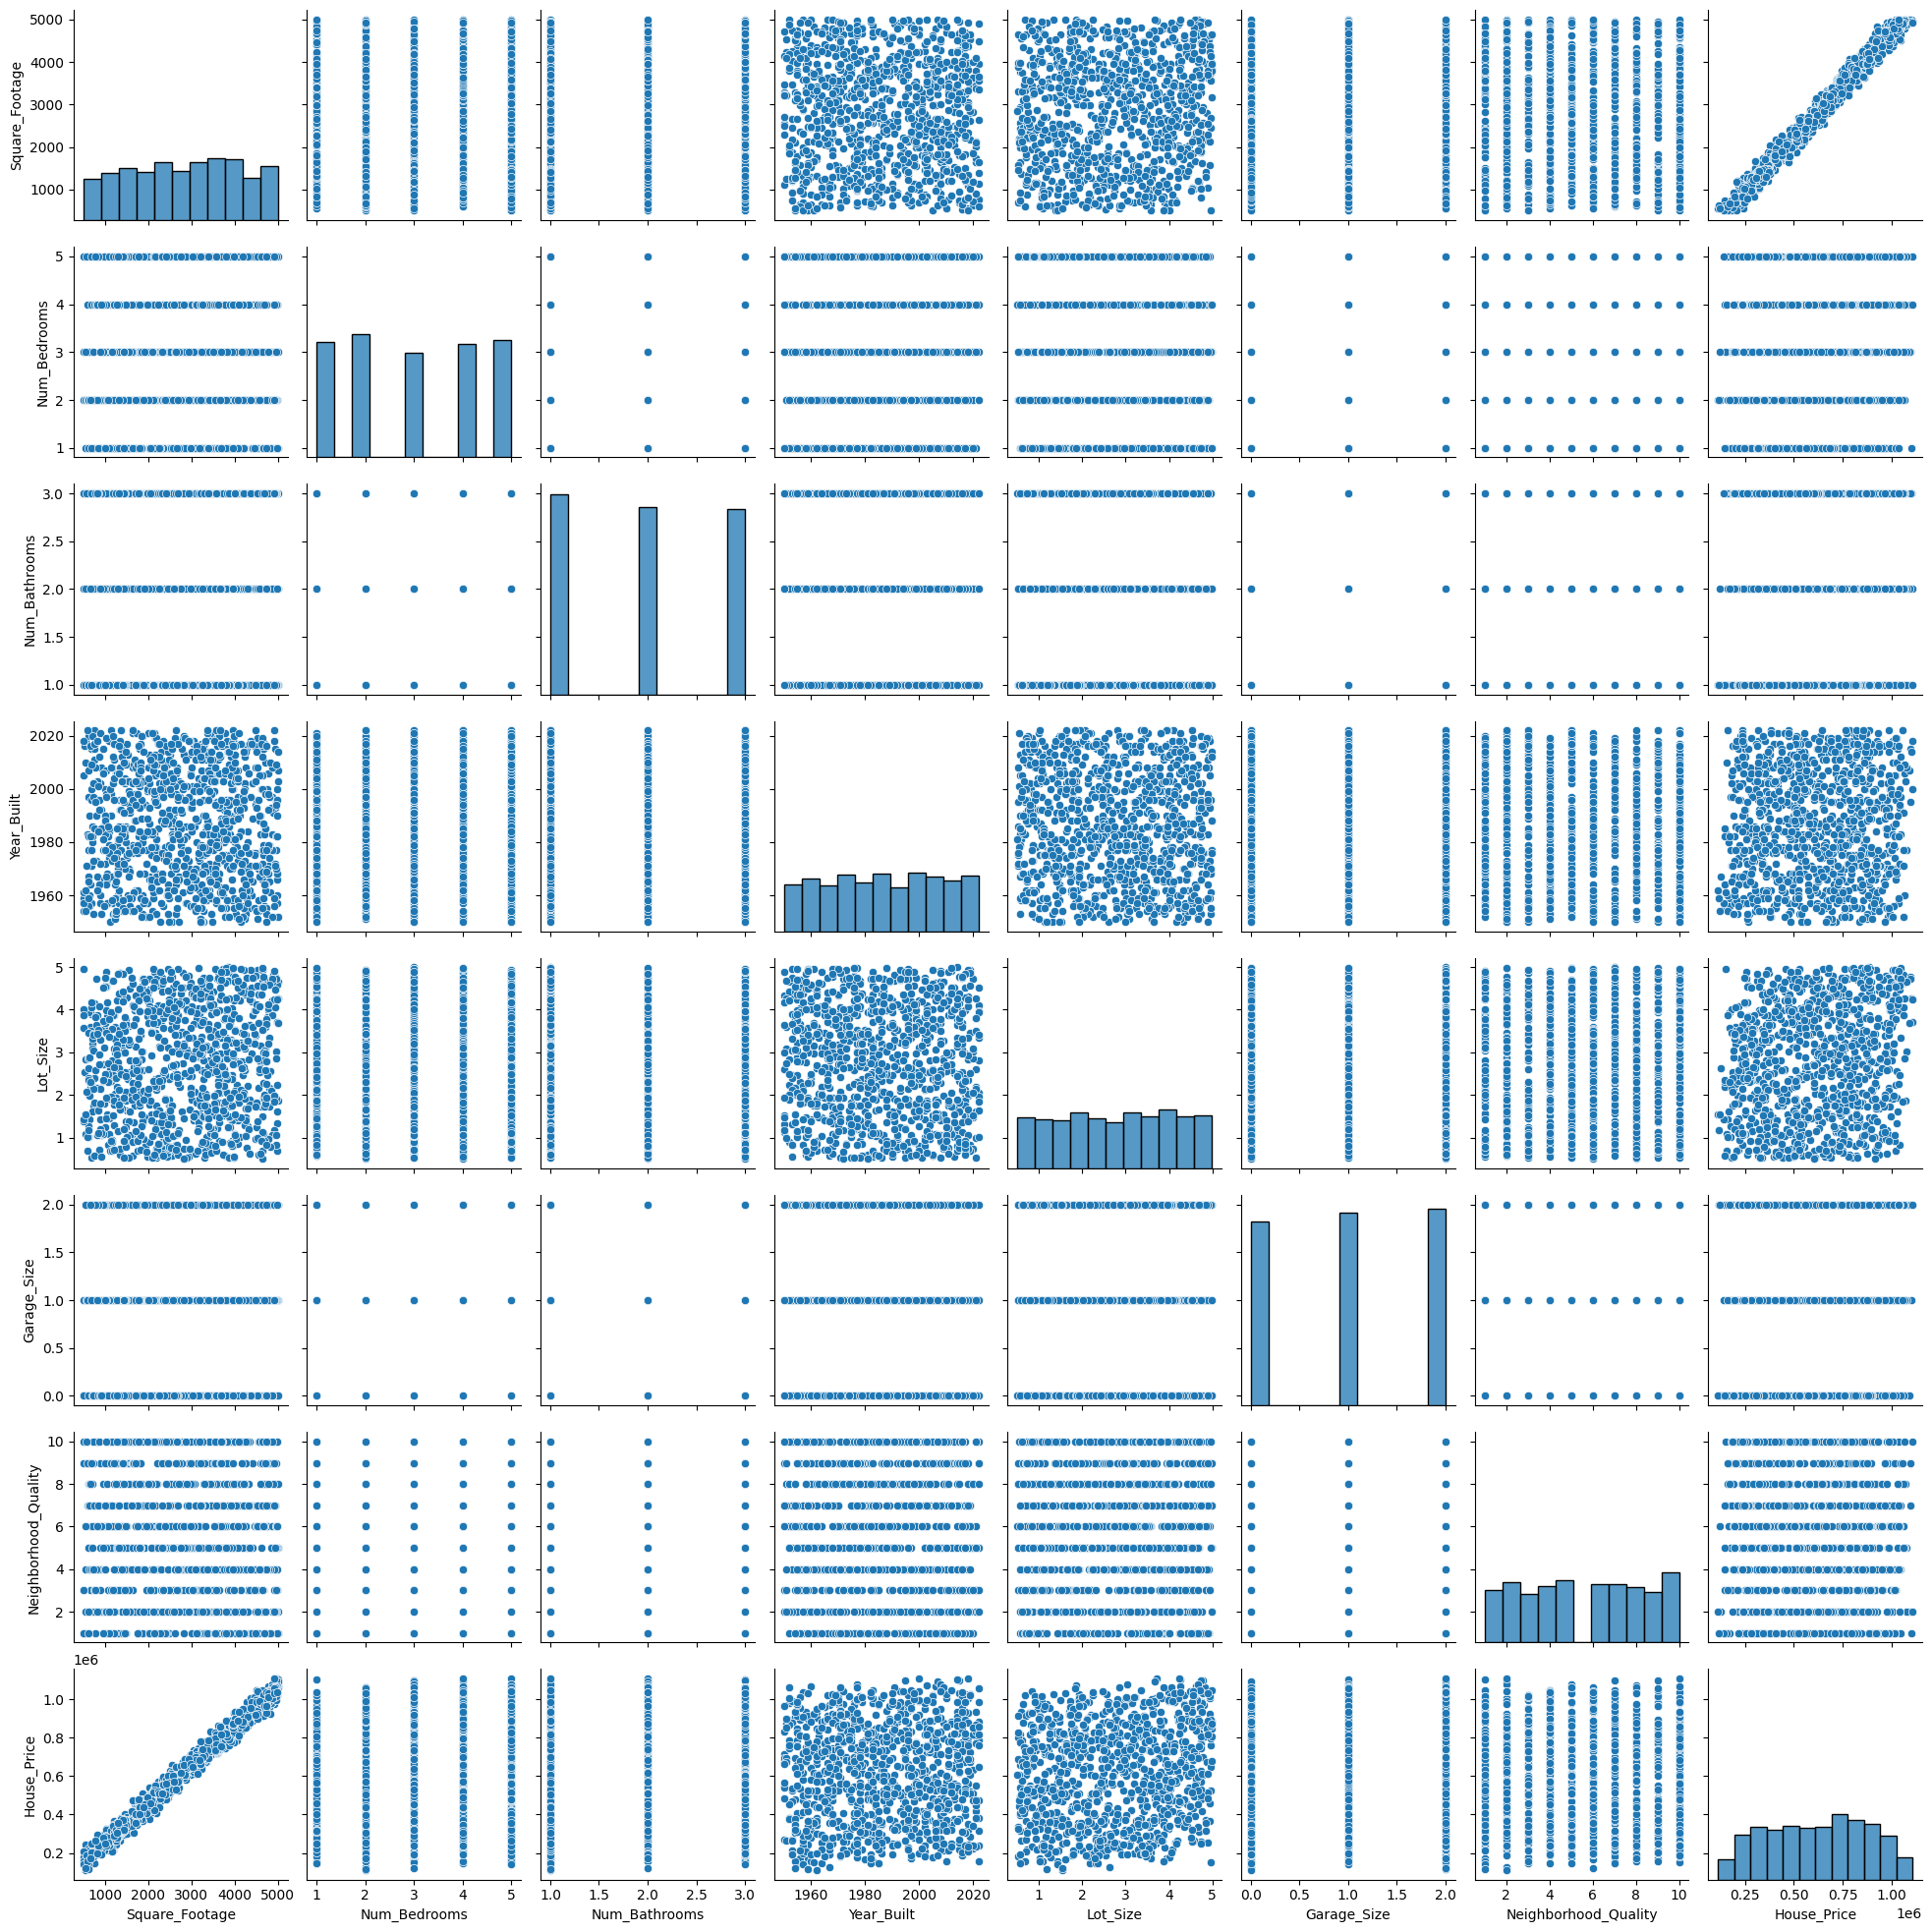

In [14]:
sns.pairplot(df)

Побудуємо матрицю кореляції.

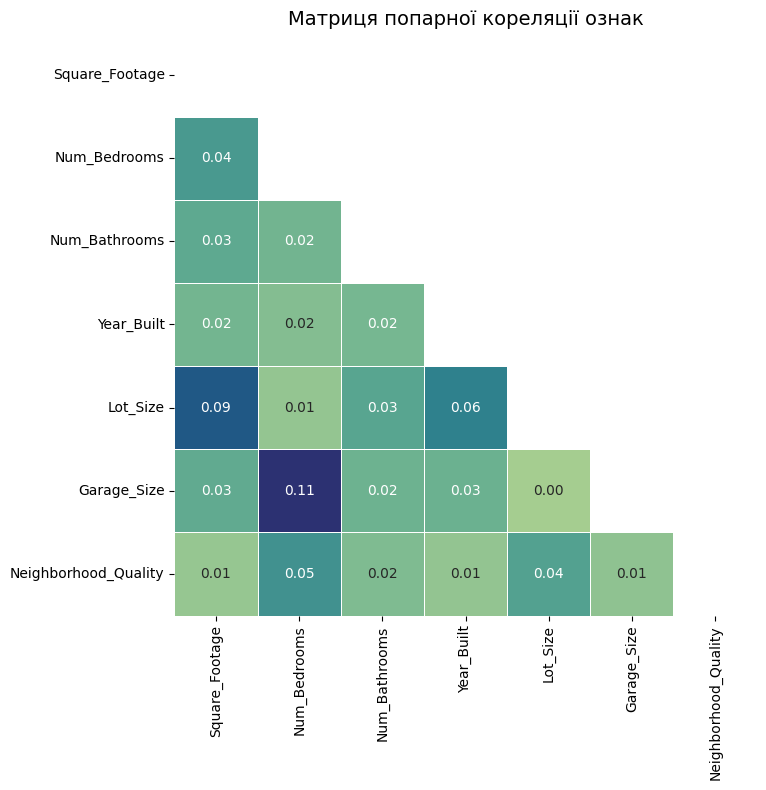

In [15]:
mtx = df.drop('House_Price', axis=1).corr(numeric_only=True).abs()

# Побудова теплової карти кореляції
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    mtx,
    cmap='crest',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),  # маскуємо верхній трикутник
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак", fontsize=14)
plt.tight_layout()
plt.show()

А можна в таком вигляді вивести матрицю кореляції

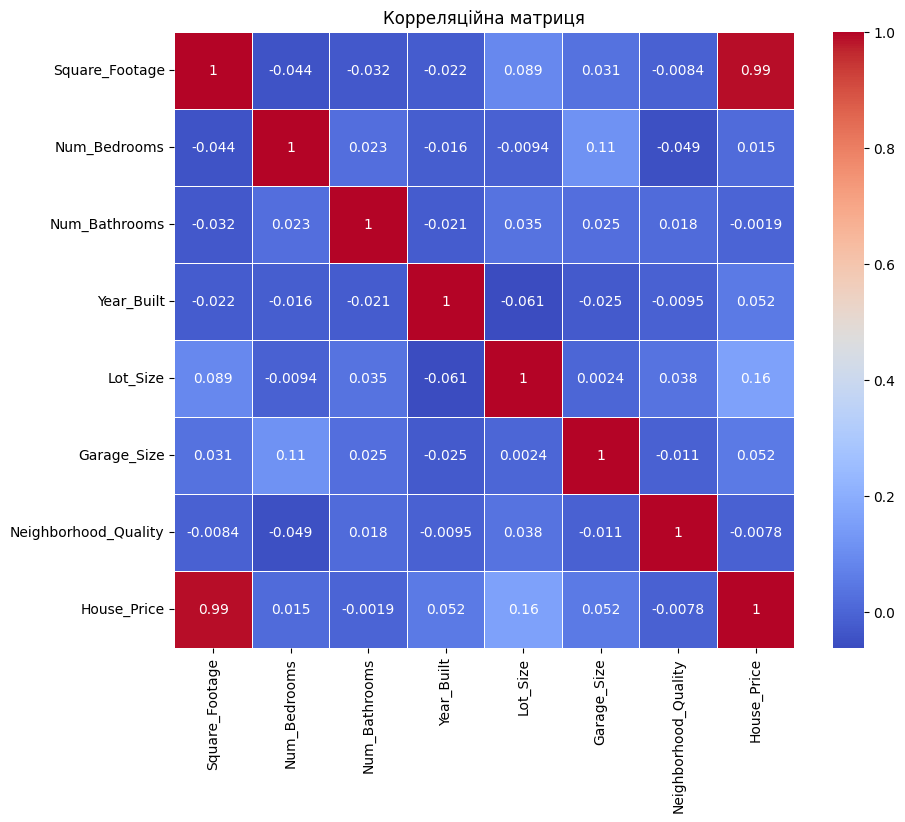

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляційна матриця')
plt.show()

Вивести кореляцію між ознаками і цільовою змінною

In [17]:
correlation_with_House_Price = correlation_matrix['House_Price'].sort_values(ascending=False)
correlation_with_House_Price

,House_Price
House_Price,1.000000
Square_Footage,0.991261
Lot_Size,0.160412
Garage_Size,0.052133
Year_Built,0.051967
Num_Bedrooms,0.014633
Num_Bathrooms,-0.001862
Neighborhood_Quality,-0.007770


## Побудуємо моделі.


Імпортуємо бібліотеки

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Відокремимо цільову змінну, поділимо датасет на тренувальну і тестову вибірки

In [19]:
X = df.drop(columns=['House_Price'])
y = df['House_Price']

Масштабуємо ознаки

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Будуємо моделі

1. Лінійна регресія
2. Ridge
3. Лассо
4. Випадковий ліс
5. Градієнтний бустинг


In [21]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

    print(f"[{name}] R²: {r2:.6f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

[LinearRegression] R²: 0.998538 | MAE: 8174.584 | MSE: 101434798.506
[Ridge] R²: 0.998536 | MAE: 8241.898 | MSE: 102486578.622
[Lasso] R²: 0.998538 | MAE: 8174.607 | MSE: 101435079.238
[Random Forest] R²: 0.998986 | MAE: 16036.022 | MSE: 384385304.066
[Gradient Boosting] R²: 0.998783 | MAE: 12350.104 | MSE: 226411487.594


Вивести графік розподілу справжніх і прогнозованих даних

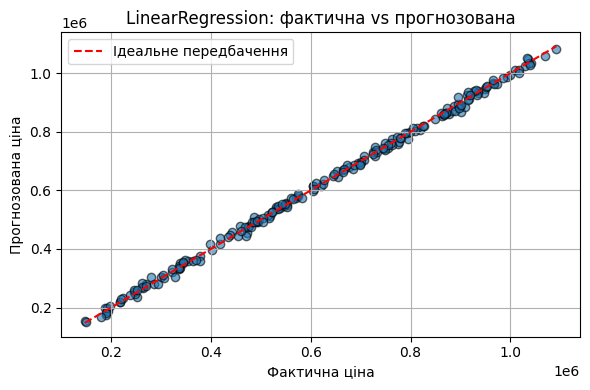

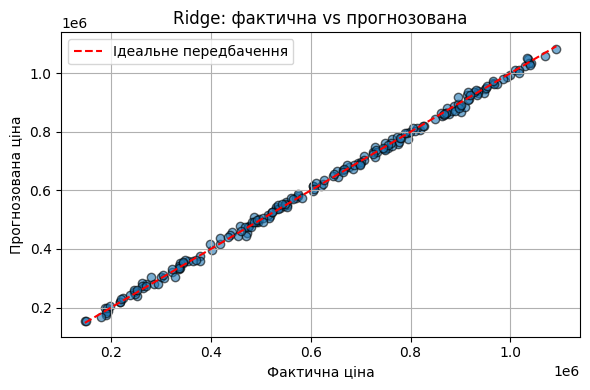

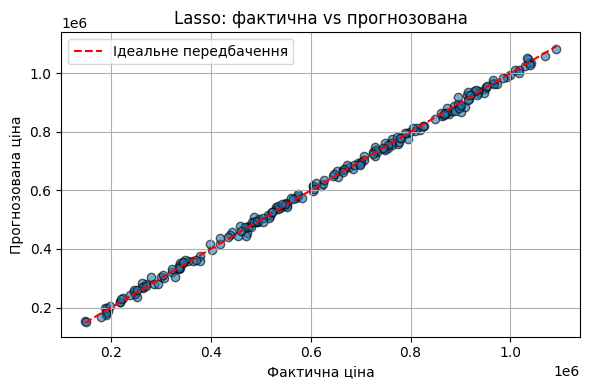

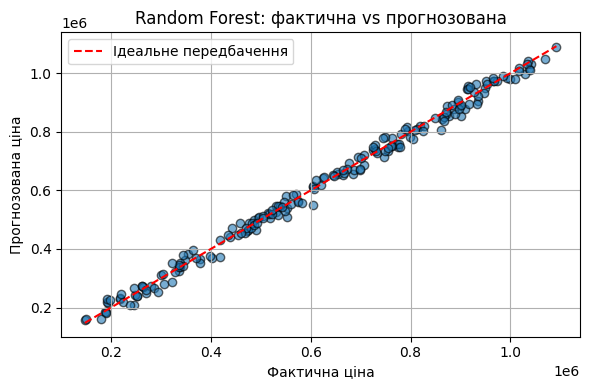

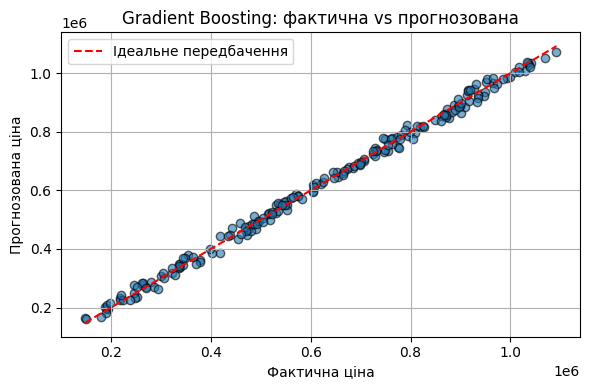

In [22]:
for name, res in results.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, res["y_pred"], alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', label='Ідеальне передбачення')

    plt.xlabel("Фактична ціна")
    plt.ylabel("Прогнозована ціна")
    plt.title(f"{name}: фактична vs прогнозована")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Підібрати оптимальні параметри для моделі Випадковий ліс

In [23]:
from sklearn.model_selection import GridSearchCV
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [24]:
rf_reg_gs = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(estimator=rf_reg_gs, param_grid = param_rf, cv=3)
rf_search.fit(X_train, y_train)
best_rf_params = rf_search.best_params_

In [25]:
best_rf_params

{'max_depth': 10,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 100}

In [26]:
rf_optimal = RandomForestRegressor(**best_rf_params, random_state=42)
rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)

In [27]:
# Розрахунки для тестових даних
rf_mse = mean_squared_error(y_test, y_pred_rf_optimal )
rf_mae = mean_absolute_error(y_test, y_pred_rf_optimal )
rf_r2 = r2_score(y_test, y_pred_rf_optimal )

Вивести метрики моделі з оптимальними параметрами

In [28]:
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

MSE: 400038896.87978363
MAE: 16137.413976430662
R2: 0.99379388783849


До підбору параметрів

[Random Forest] R²: 0.998960 | МАЕ: 15833.409 | MSE: 376172438.005

Зробити висновок, як краще, з оптимальними параметрами чи ні.

Отримати передбачення для лінійної регресії

In [29]:
# Отримуємо передбачення для лінійної регресії
linreg_pred = results['LinearRegression']['y_pred']

# Створюємо DataFrame для аналізу
comparison_df = pd.DataFrame({
    "Фактична ціна": y_test.values,
    "Передбачена ціна": linreg_pred,
})
comparison_df["Похибка, %"] = (np.abs(comparison_df["Передбачена ціна"] - comparison_df["Фактична ціна"])/comparison_df["Фактична ціна"])*100

# Вибираємо 10 випадкових рядків
sample = comparison_df.sample(10, random_state=42)

# Виводимо
print(sample.round(2))

     Фактична ціна  Передбачена ціна  Похибка, %
95      1068538.11        1059729.02        0.82
15       194353.74         187868.55        3.34
30       270230.64         279715.82        3.51
158      986006.86         981949.27        0.41
128      953339.73         957382.95        0.42
115      914555.75         909764.27        0.52
69       746167.73         742469.14        0.50
170      646766.29         654445.55        1.19
174      523323.07         524605.44        0.25
45      1008539.16        1011343.64        0.28


**Висновок щодо оптимізації Random Forest:**

Модель без підбору параметрів (Default) виявилася кращою за всіма трьома метриками на тестовій вибірці(початкові параметри за замовчуванням були близькі до оптимальних, або обрана сітка параметрів не містила кращої комбінації)

* R2 (Коефіцієнт детермінації): Значення знизилося з 0.998960 до 0.993794. Це означає, що початкова модель краще пояснює дисперсію цільової змінної.

* MAE (Середня абсолютна похибка): Похибка зросла з 15833.41 до 16137.41 (в середньому прогнози погіршилися приблизно на 300)

* MSE (Середньоквадратична похибка): Похибка зросла з 376 млн. до 400 млн.



